# Importing Required Libaries:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import re
import nltk

from nltk.corpus import stopwords

import warnings
warnings.simplefilter("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay



# Read the Data:

In [4]:
data=pd.read_csv(r"E:\Protfolio Projects\Machince Learning\Phishing URL detection\Dataset\phishing_site_urls.csv")

# Data Description:

In [5]:
data.head(5)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [6]:
data.tail(5)

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [7]:
data.shape
print("No.of rows in the data:",data.shape[0])
print("No.of columns in the data:",data.shape[1])

No.of rows in the data: 549346
No.of columns in the data: 2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


# Data Preprocessing:
1) check if any duplicates rows in the data.

In [9]:
data.duplicated().sum()

42150

In [10]:
dataset=data.drop_duplicates()

In [11]:
dataset.shape
print("No.of rows in the data:",dataset.shape[0])
print("No.of columns in the data:",dataset.shape[1])

No.of rows in the data: 507196
No.of columns in the data: 2


# Cleaning /:@#!!! symbols from the datasets:

In [12]:
dataset["URL"].iloc[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [13]:
def case_convert():
    dataset.URL=[i.lower() for i in dataset.URL.values]
    
def remove_numbers():
    dataset.URL=[re.sub(r"[^a-zA-Z]"," ",url) for url in dataset.URL.values]
    
def remove_stopwords():
    stopwords_set=set(stopwords.words("english"))
    dataset.URL=[word for word in dataset.URL if word not in stopwords_set]
    
def normalize_spaces():
    dataset.URL=[re.sub(r"\s+"," ",url) for url in dataset.URL.values]

In [14]:
case_convert()
remove_numbers()
remove_stopwords()
normalize_spaces()

In [15]:
dataset["URL"].iloc[0]

'nobell it ffb d dca cce f login skype com en cgi bin verification login ffb d dca cce f index php cmd profile ach outdated page tmpl p gen failed to load nav login access '

In [16]:
dataset.head(5)

,URL,Label
0,nobell it ffb d dca cce f login skype com en c...,bad
1,www dghjdgf com paypal co uk cycgi bin webscrc...,bad
2,serviciosbys com paypal cgi bin get into herf ...,bad
3,mail printakid com www online americanexpress ...,bad
4,thewhiskeydregs com wp content themes widescre...,bad


# check the if dataset is Balanced or not ?

In [17]:
dataset["Label"].value_counts()

good    392897
bad     114299
Name: Label, dtype: int64

# Feature Engineering:
Splitting Dataset into two features ie) X & y variables...

In [18]:
x=dataset["URL"]
x

0         nobell it ffb d dca cce f login skype com en c...
1         www dghjdgf com paypal co uk cycgi bin webscrc...
2         serviciosbys com paypal cgi bin get into herf ...
3         mail printakid com www online americanexpress ...
4         thewhiskeydregs com wp content themes widescre...
                                ...                        
516466                                                     
516467                                   apple checker org 
516468                                    apple iclods org 
516469                                   apple uptoday org 
516470                                    apple search info
Name: URL, Length: 507196, dtype: object

In [19]:
y=dataset["Label"]
y

0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
516466    bad
516467    bad
516468    bad
516469    bad
516470    bad
Name: Label, Length: 507196, dtype: object

# Data Transformation:
Coverting Text into Numerical formates using countvectorizer.....

In [20]:
CV=CountVectorizer()
X=CV.fit_transform(x)
print(X)

  (0, 225826)	1
  (0, 157286)	1
  (0, 108986)	2
  (0, 76644)	2
  (0, 51431)	2
  (0, 189365)	3
  (0, 292800)	1
  (0, 63362)	1
  (0, 97993)	1
  (0, 54020)	1
  (0, 33876)	1
  (0, 336759)	1
  (0, 152089)	1
  (0, 247315)	1
  (0, 61171)	1
  (0, 255398)	1
  (0, 3176)	1
  (0, 238276)	1
  (0, 239871)	1
  (0, 319442)	1
  (0, 123330)	1
  (0, 105170)	1
  (0, 319757)	1
  (0, 188800)	1
  (0, 219333)	1
  :	:
  (507189, 256791)	1
  (507189, 101814)	1
  (507189, 172059)	1
  (507189, 28693)	1
  (507189, 260952)	1
  (507189, 88735)	1
  (507190, 63362)	1
  (507190, 201023)	1
  (507190, 72353)	1
  (507190, 85116)	1
  (507190, 141726)	1
  (507190, 209893)	1
  (507190, 157823)	1
  (507192, 236615)	1
  (507192, 15977)	1
  (507192, 55528)	1
  (507193, 236615)	1
  (507193, 15977)	1
  (507193, 148243)	1
  (507194, 236615)	1
  (507194, 15977)	1
  (507194, 331885)	1
  (507195, 152929)	1
  (507195, 15977)	1
  (507195, 284353)	1


In [21]:
y=dataset["Label"].replace({"bad":0,"good":1})
y

0         0
1         0
2         0
3         0
4         0
         ..
516466    0
516467    0
516468    0
516469    0
516470    0
Name: Label, Length: 507196, dtype: int64

# Resampling 
Converting Imbalanced data to Balanced Data using SMOTE method....

In [22]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [23]:
y_sm.value_counts()

0    392897
1    392897
Name: Label, dtype: int64

# Splitting Dataset into Training Data and Testing Data (training_data=80%, Testing_data=20%):

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(628635, 369586)
(157159, 369586)
(628635,)
(157159,)


# Model Training:

In [26]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.9747261924646258

In [27]:
LR.score(X_test,y_test)

0.9397552796849051

In [28]:
y_pred_LR=LR.predict(X_test)

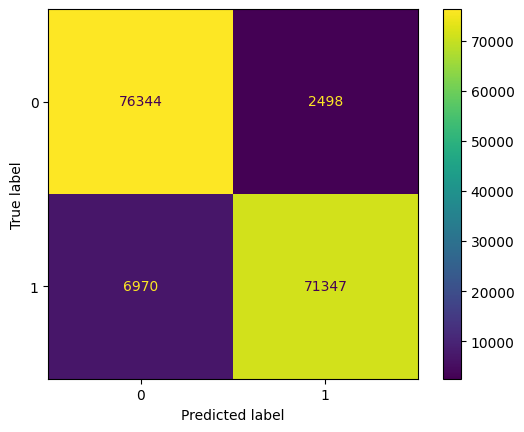

In [29]:
cm=confusion_matrix(y_test,y_pred_LR)
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [30]:
print("Accuracy_score for Logistic Regression:",accuracy_score(y_test,y_pred_LR))
print("Precision_score for Logistic Regression:",precision_score(y_test,y_pred_LR))
print("Recall_score for Logistic Regression:",recall_score(y_test,y_pred_LR))

Accuracy_score for Logistic Regression: 0.9397552796849051
Precision_score for Logistic Regression: 0.9661723881102309
Recall_score for Logistic Regression: 0.9110027197160259


In [32]:
# RF=RandomForestClassifier()
# RF.fit(X_train,y_train)
# RF.score(X_train,y_train)

In [36]:
pickle.dump(LR,open(r"E:\Protfolio Projects\Machince Learning\Phishing URL detection\Dataset/LR.pkl","wb"))

In [38]:
loaded_model=pickle.load(open(r"E:\Protfolio Projects\Machince Learning\Phishing URL detection\Dataset\LR.pkl","rb"))

In [39]:
y_prediction=loaded_model.predict(X_test)

In [40]:
y_prediction

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [63]:
URL=[dataset["URL"][144626]]
URL

['arrowheadaddict com kansas city chiefs highlight video ']

In [64]:
vect=CV.transform(URL).toarray()

In [65]:
prediction=loaded_model.predict(vect)
prediction

array([1], dtype=int64)

In [66]:
if prediction==0:
    print("Phishing URL")
else:
    print("Legal URL")

Legal URL
